In [39]:
# Importation des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Pour l'affichage des graphiques dans le notebook
%matplotlib inline

# Génération de la data simulée (100 observations)
np.random.seed(42)
data = pd.DataFrame({
    'poids': np.random.normal(2.5, 0.5, 100),
    'nourriture': np.random.normal(1.2, 0.3, 100),
    'température': np.random.normal(25, 2, 100)
})

# Affichage des 5 premières lignes
data.head()


,poids,nourriture,température
0,2.748357,0.775389,25.715575
1,2.430868,1.073806,26.121569
2,2.823844,1.097186,27.166102
3,3.261515,0.959317,27.107604
4,2.382923,1.151614,22.244661


In [40]:
# Calcul des statistiques descriptives
desc_stats = data.describe()
print("Statistiques descriptives :\n", desc_stats)

# Calcul de la médiane séparément
medians = data.median()
print("\nMédianes :\n", medians)


Statistiques descriptives :
             poids  nourriture  température
count  100.000000  100.000000   100.000000
mean     2.448077    1.206691    25.129793
std      0.454084    0.286101     2.168566
min      1.190127    0.624369    18.517465
25%      2.199547    0.958302    23.689113
50%      2.436522    1.225232    25.195391
75%      2.702976    1.361451    26.408875
max      3.426139    2.016051    32.705463

Médianes :
 poids           2.436522
nourriture      1.225232
température    25.195391
dtype: float64


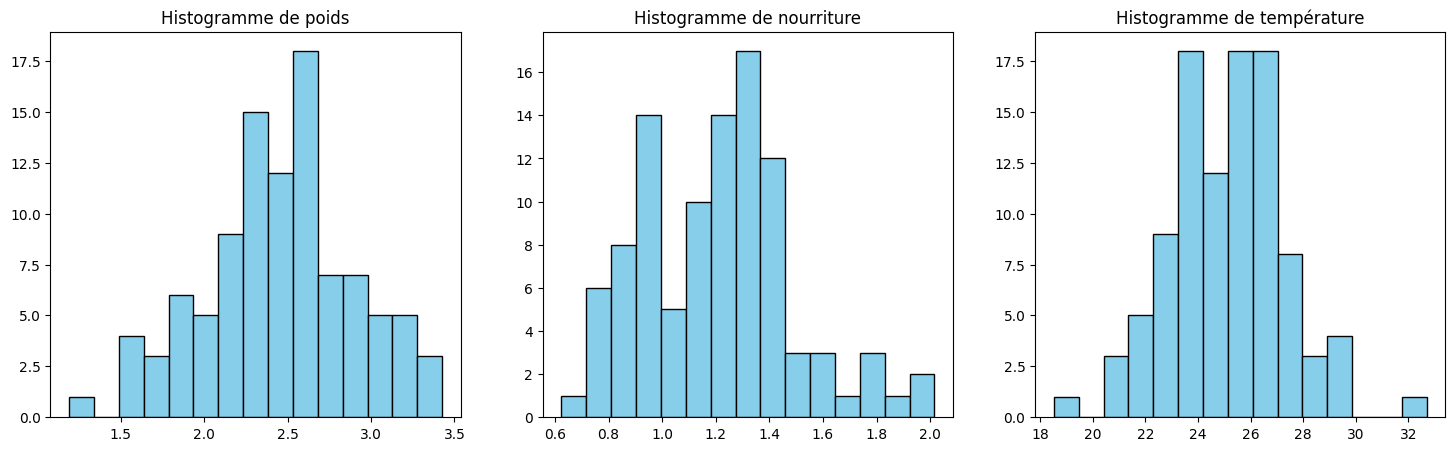

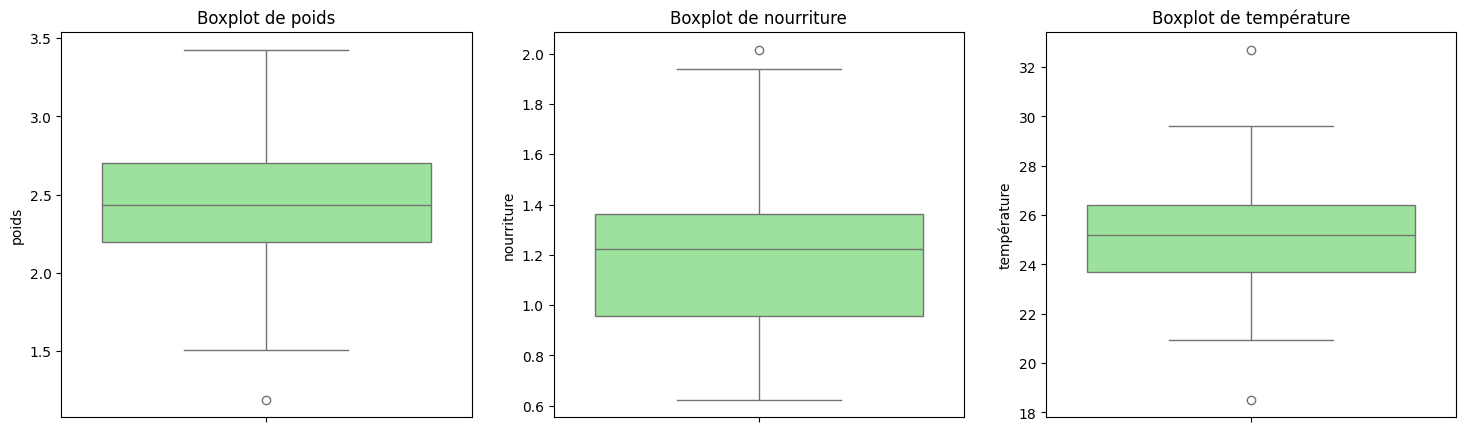

In [41]:
# Histogrammes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histogramme de {col}")
plt.show()

# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(data.columns):
    sns.boxplot(y=data[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Boxplot de {col}")
plt.show()


In [42]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers_iqr = {}
for col in data.columns:
    outliers_iqr[col] = detect_outliers_iqr(data, col)
    print(f"Nombre d'outliers détectés pour {col} (IQR): {len(outliers_iqr[col])}")


Nombre d'outliers détectés pour poids (IQR): 1
Nombre d'outliers détectés pour nourriture (IQR): 1
Nombre d'outliers détectés pour température (IQR): 2


In [43]:
def detect_outliers_zscore(df, col, threshold=3):
    z_scores = np.abs(stats.zscore(df[col]))
    return df[z_scores > threshold]

outliers_z = {}
for col in data.columns:
    outliers_z[col] = detect_outliers_zscore(data, col)
    print(f"Nombre d'outliers détectés pour {col} (Z-Score): {len(outliers_z[col])}")


Nombre d'outliers détectés pour poids (Z-Score): 0
Nombre d'outliers détectés pour nourriture (Z-Score): 0
Nombre d'outliers détectés pour température (Z-Score): 2


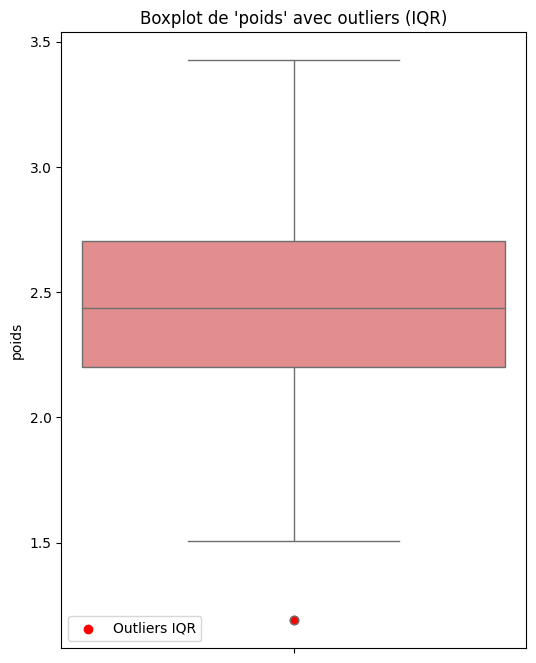

In [44]:
# affichage pour la variable 'poids'
plt.figure(figsize=(6, 8))
sns.boxplot(y=data['poids'], color='lightcoral')
# Affichage des outliers détectés par IQR sous forme de points en rouge
plt.scatter(np.zeros(len(outliers_iqr['poids'])), outliers_iqr['poids']['poids'], color='red', label='Outliers IQR')
plt.title("Boxplot de 'poids' avec outliers (IQR)")
plt.legend()
plt.show()


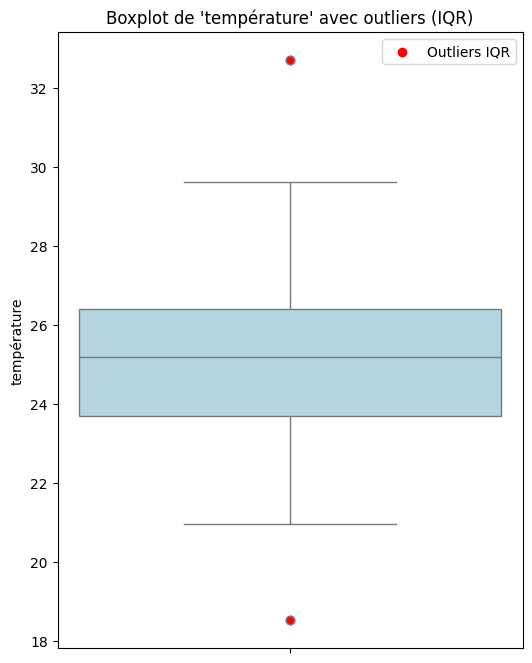

In [47]:
# Visualisation avec boxplot pour la variable 'température'
plt.figure(figsize=(6, 8))
sns.boxplot(y=data['température'], color='lightblue')
plt.scatter(np.zeros(len(outliers_iqr['température'])), 
            outliers_iqr['température']['température'], 
            color='red', label='Outliers IQR')
plt.title("Boxplot de 'température' avec outliers (IQR)")
plt.legend()
plt.show()

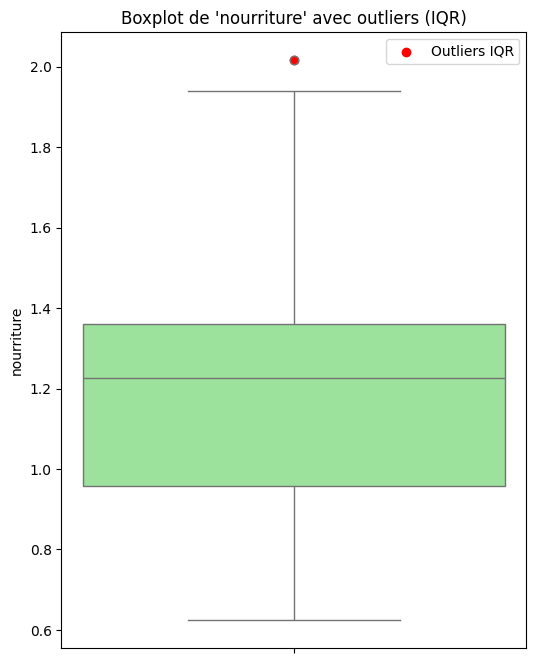

In [48]:
# Visualisation avec boxplot pour la variable 'nourriture'
plt.figure(figsize=(6, 8))
sns.boxplot(y=data['nourriture'], color='lightgreen')
plt.scatter(np.zeros(len(outliers_iqr['nourriture'])), 
            outliers_iqr['nourriture']['nourriture'], 
            color='red', label='Outliers IQR')
plt.title("Boxplot de 'nourriture' avec outliers (IQR)")
plt.legend()
plt.show()

In [7]:
for col in data.columns:
    stat, p = stats.shapiro(data[col])
    print(f"Test de Shapiro-Wilk pour {col} : Statistique={stat:.3f}, p-value={p:.3f}")
    if p > 0.05:
        print(f"  --> {col} semble suivre une loi normale\n")
    else:
        print(f"  --> {col} ne suit pas une loi normale\n")


Test de Shapiro-Wilk pour poids : Statistique=0.990, p-value=0.655
  --> poids semble suivre une loi normale

Test de Shapiro-Wilk pour nourriture : Statistique=0.978, p-value=0.085
  --> nourriture semble suivre une loi normale

Test de Shapiro-Wilk pour température : Statistique=0.986, p-value=0.355
  --> température semble suivre une loi normale



In [8]:
# Création d'un groupe binaire en se basant sur la médiane de 'nourriture'
data['groupe_nourriture'] = np.where(data['nourriture'] < data['nourriture'].median(), 'faible', 'élevé')

# Test t de Student pour comparer la moyenne de 'poids' entre les deux groupes
group1 = data[data['groupe_nourriture'] == 'faible']['poids']
group2 = data[data['groupe_nourriture'] == 'élevé']['poids']
t_stat, p_val = stats.ttest_ind(group1, group2)
print("Test t de Student pour 'poids' entre groupe faible et élevé de nourriture:")
print("t-statistique = {:.3f}, p-value = {:.3f}".format(t_stat, p_val))

# Création de trois groupes pour l'ANOVA en se basant sur des quantiles de 'température'
data['groupe_temp'] = pd.qcut(data['température'], 3, labels=["bas", "moyen", "élevé"])
anova_groups = [group['poids'] for name, group in data.groupby('groupe_temp')]
f_stat, p_anova = stats.f_oneway(*anova_groups)
print("\nANOVA pour comparer la moyenne de 'poids' entre les groupes de température:")
print("F-statistique = {:.3f}, p-value = {:.3f}".format(f_stat, p_anova))


Test t de Student pour 'poids' entre groupe faible et élevé de nourriture:
t-statistique = 1.110, p-value = 0.270

ANOVA pour comparer la moyenne de 'poids' entre les groupes de température:
F-statistique = 0.977, p-value = 0.380


C:\Users\pc\AppData\Local\Temp\ipykernel_15760\4127433186.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_groups = [group['poids'] for name, group in data.groupby('groupe_temp')]


In [1]:
# Importation des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du dataset (vérifiez que le chemin est correct)
df = pd.read_csv(r"C:\Users\pc\Downloads\donnees_elevage_poulet.csv")

# Sélection de toutes les colonnes numériques pour l'ACP
features = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C', 
            'Humidite_%', 'Age_poulet_jours', 'Gain_poids_jour_g', 'Taux_survie_%', 'Cout_elevage_FCFA']
X = df[features].dropna().values  # Suppression des lignes manquantes le cas échéant

# Centrage des données (soustraction de la moyenne)
X_centered = X - X.mean(axis=0)

# Calcul de la matrice de covariance (les variables en colonnes)
cov_matrix = np.cov(X_centered, rowvar=False)
print("Matrice de covariance :\n", cov_matrix)

# Calcul des valeurs propres et vecteurs propres
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

# Tri décroissant des valeurs propres
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

print("\nValeurs propres (triées) :\n", eigen_values)
print("\nVecteurs propres correspondants :\n", eigen_vectors)




Matrice de covariance :
 [[ 8.07188818e+05 -3.22367548e+03  3.53687236e+01  6.00602452e+02
  -1.02639779e+03  1.04952171e+02 -6.64637849e+02 -7.27627958e+04]
 [-3.22367548e+03  1.93654269e+03 -1.68797035e+01 -9.25863317e+00
  -1.32521307e+02 -1.20573593e+01 -1.23876784e+01  6.93684402e+03]
 [ 3.53687236e+01 -1.68797035e+01  4.26721508e+00 -4.88540704e-01
  -3.72124623e+00  5.11422613e-01 -2.71135678e-02  5.50648804e+02]
 [ 6.00602452e+02 -9.25863317e+00 -4.88540704e-01  7.72656040e+01
  -4.29969849e-01 -3.80287437e-01  1.35219698e+00  1.21404299e+03]
 [-1.02639779e+03 -1.32521307e+02 -3.72124623e+00 -4.29969849e-01
   7.94434573e+02  3.51383920e+00 -5.30454271e+00  4.80983457e+03]
 [ 1.04952171e+02 -1.20573593e+01  5.11422613e-01 -3.80287437e-01
   3.51383920e+00  1.76179796e+01 -3.90096482e-01  8.23711980e+02]
 [-6.64637849e+02 -1.23876784e+01 -2.71135678e-02  1.35219698e+00
  -5.30454271e+00 -3.90096482e-01  3.89710513e+01 -1.60771399e+03]
 [-7.27627958e+04  6.93684402e+03  5.5064880

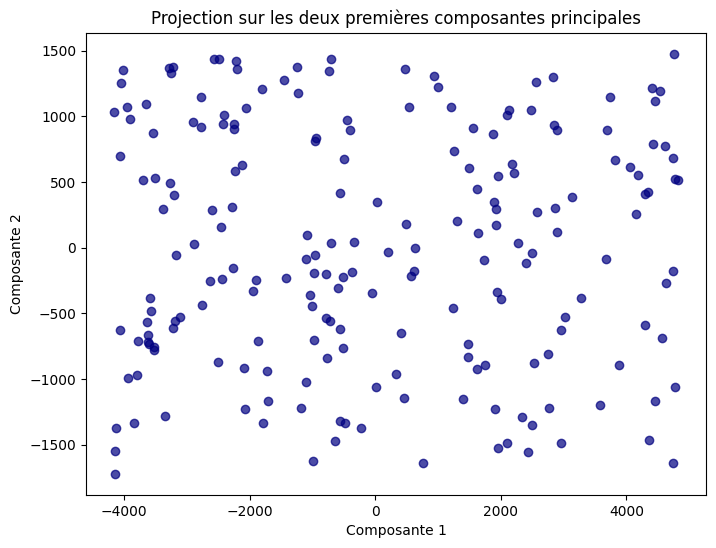

Variance expliquée par composante : [9.01972290e-01 9.76831777e-02 2.34439443e-04 9.36277827e-05
 9.28975196e-06 4.57803547e-06 2.11065581e-06 4.86693814e-07]
Variance cumulée : [0.90197229 0.99965547 0.99988991 0.99998353 0.99999282 0.9999974
 0.99999951 1.        ]


In [2]:
# Projection des données sur les deux premières composantes principales
PCs = np.dot(X_centered, eigen_vectors[:, :2])

# Visualisation de la projection
plt.figure(figsize=(8,6))
plt.scatter(PCs[:, 0], PCs[:, 1], alpha=0.7, color='navy')
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Projection sur les deux premières composantes principales")
plt.show()

# Calcul de la variance expliquée par chaque composante
total_variance = eigen_values.sum()
variance_expliquee = eigen_values / total_variance
print("Variance expliquée par composante :", variance_expliquee)

# Affichage du cumul de la variance expliquée
variance_cumulee = np.cumsum(variance_expliquee)
print("Variance cumulée :", variance_cumulee)

In [3]:
# Calcul de la variance expliquée par chaque composante
total_variance = eigen_values.sum()
variance_expliquee = eigen_values / total_variance
print("Variance expliquée par composante :", variance_expliquee)

# Affichage du cumul de la variance expliquée
variance_cumulee = np.cumsum(variance_expliquee)
print("Variance cumulée :", variance_cumulee)

Variance expliquée par composante : [9.01972290e-01 9.76831777e-02 2.34439443e-04 9.36277827e-05
 9.28975196e-06 4.57803547e-06 2.11065581e-06 4.86693814e-07]
Variance cumulée : [0.90197229 0.99965547 0.99988991 0.99998353 0.99999282 0.9999974
 0.99999951 1.        ]


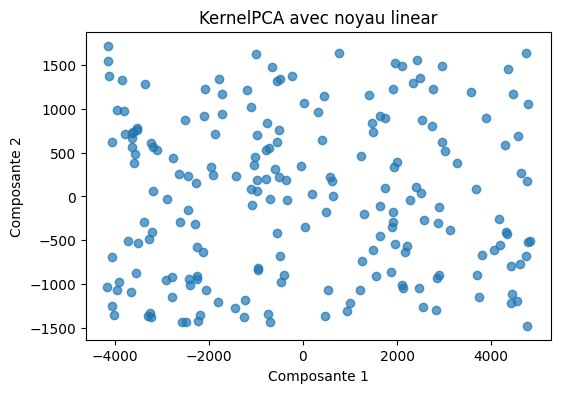

In [ ]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf', 'poly']
results = {}



for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, fit_inverse_transform=False, random_state=42)
    X_kpca = kpca.fit_transform(X_centered)
    results[kernel] = X_kpca

    plt.figure(figsize=(6,4))
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.7)
    plt.title(f"KernelPCA avec noyau {kernel}")
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Création de la variable cible binaire pour la survie
# Ici, si Taux_survie_% >= 50, alors poulet survivant (1) sinon 0
df['survie'] = (df['Taux_survie_%'] >= 50).astype(int)

# Sélection des features pour la classification
# On peut utiliser la plupart des variables explicatives sauf la cible et éventuellement celles redondantes
features_clf = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C', 
                'Humidite_%', 'Age_poulet_jours', 'Gain_poids_jour_g', 'Cout_elevage_FCFA']
X_clf = df[features_clf].dropna()
y_clf = df['survie'].loc[X_clf.index]

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Création et entraînement du RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluation des performances
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("RandomForestClassifier - Accuracy: {:.3f}, F1-score: {:.3f}".format(acc, f1))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))


RandomForestClassifier - Accuracy: 1.000, F1-score: 1.000

Rapport de classification:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Importance des variables :
 Poids_poulet_g                 0.0
Nourriture_consommee_g_jour    0.0
Temperature_enclos_C           0.0
Humidite_%                     0.0
Age_poulet_jours               0.0
Gain_poids_jour_g              0.0
Cout_elevage_FCFA              0.0
dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_17500\4165025637.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, hue=None, palette='viridis')


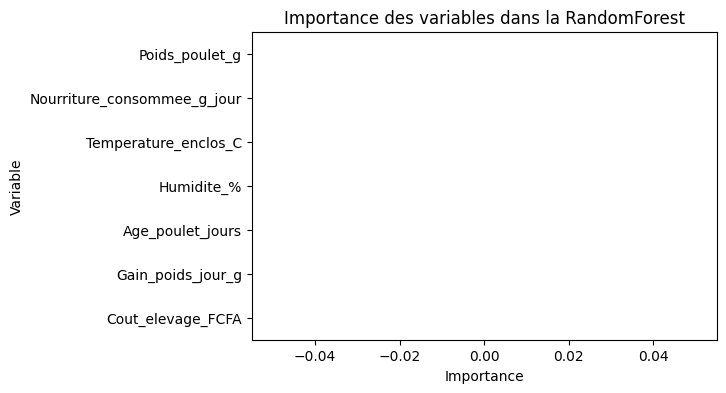

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=features_clf).sort_values(ascending=False)
print("Importance des variables :\n", feature_importance)

# visualisation de l'importance des variables
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance.values, y=feature_importance.index, hue=None, palette='viridis')
plt.title("Importance des variables dans la RandomForest")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()



Répartition de la cible 'survie' :
survie
1    200
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_17500\1547002948.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['survie'], palette='viridis')


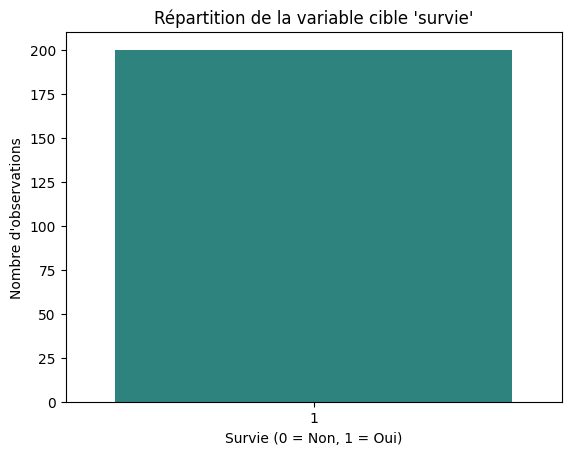

In [24]:
# Répartition de la variable cible
print("\nRépartition de la cible 'survie' :")
print(df['survie'].value_counts())

# Visualiser la répartition
sns.countplot(x=df['survie'], palette='viridis')
plt.title("Répartition de la variable cible 'survie'")
plt.xlabel("Survie (0 = Non, 1 = Oui)")
plt.ylabel("Nombre d'observations")
plt.show()


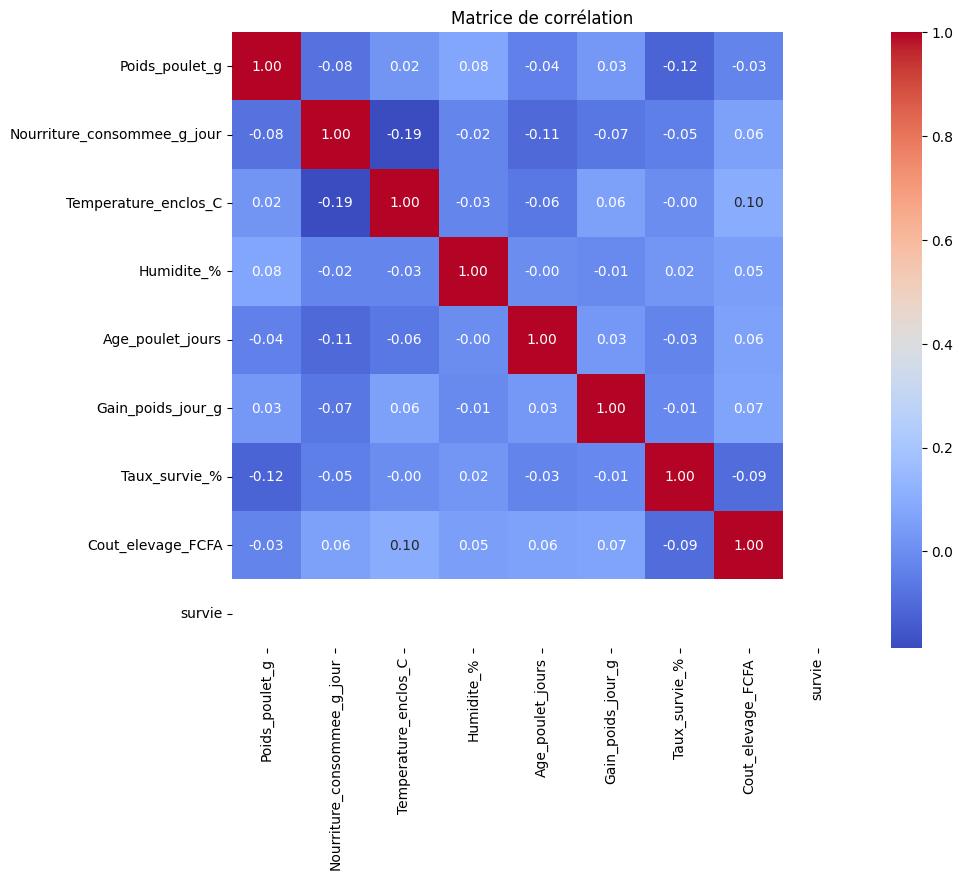

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la variable cible
df['survie'] = (df['Taux_survie_%'] >= 50).astype(int)

# Matrice de corrélation
corr_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()


In [13]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des features pour la régression
# Ici, la cible est Gain_poids_jour_g et on utilise les autres colonnes explicatives
features_reg = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C', 
                'Humidite_%', 'Age_poulet_jours', 'Taux_survie_%', 'Cout_elevage_FCFA']
X_reg = df[features_reg].dropna()
y_reg = df['Gain_poids_jour_g'].loc[X_reg.index]

# Séparation en ensembles d'entraînement et de test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# AdaBoost pour la régression
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
ada.fit(X_train_reg, y_train_reg)
y_pred_ada = ada.predict(X_test_reg)

# Gradient Boosting pour la régression
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_reg, y_train_reg)
y_pred_gbr = gbr.predict(X_test_reg)

# Fonction d'évaluation
def eval_reg(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.3f}, R2: {r2:.3f}")

eval_reg("AdaBoost", y_test_reg, y_pred_ada)
eval_reg("Gradient Boosting", y_test_reg, y_pred_gbr)


AdaBoost - MSE: 21.823, R2: -0.223
Gradient Boosting - MSE: 26.971, R2: -0.512
